# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Please ensure that the data files are extracted and "dataset_A.npz", "dataset_B.npz", "dataset_C.npz" and "dataset_D.npz" are in the same directory as this execution file. (Note: The .npz files and not the .npy files should be in the same directory)

In [2]:
# Rough cell, can be removed or retained
import warnings
warnings.filterwarnings('ignore')

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [3]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def getKernel(X, kernel, kernel_param):
    if(kernel == "linear"):
        K = np.matmul(X, X.T)
    elif(kernel == "poly"):
        K = (1 + np.matmul(X, X.T)) ** kernel_param
    elif(kernel == "rbf"):
        M = np.sum(X ** 2, axis = -1)
        K = np.exp(-kernel_param * (M[:,None] + M[None,:] - 2 * np.matmul(X, X.T)))    
    return K
    

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100):
    """
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly' 
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)
    
    """
    
    alpha = np.zeros(len(X)) # Initializing with zeros
    eta = 1e-3
    K = getKernel(X, kernel, kernel_param)
    for i in range(num_iter_gd):
        gradient_loss = np.zeros(len(X))
        for j in range(len(X)):
            gradient_loss += -Y[i] * sigmoid(-Y[i] * np.dot(alpha, K[:,i])) * K[:,i] + reg_param * np.matmul(K, alpha)
        alpha -= eta * gradient_loss
        
    return alpha
    
    
def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    if(kernel == "linear"):
        pred = np.sign(np.sum(alpha * np.matmul(test_X, train_X.T), axis = -1))
    elif(kernel == "poly"):
#         print(np.sum(alpha * ((1 + np.matmul(test_X, train_X.T)) ** kernel_param), axis = -1))
        pred = np.sign(np.sum(alpha * ((1 + np.matmul(test_X, train_X.T)) ** kernel_param), axis = -1))
    elif(kernel == "rbf"):
        test_norm = np.sum(test_X ** 2, axis = -1)
        train_norm = np.sum(train_X ** 2, axis = -1)
        pred = np.sign(np.sum(alpha * np.exp(-kernel_param * (test_norm[:,None] + train_norm[None,:] - 2 * np.matmul(test_X, train_X.T))), axis = -1))
    return pred

In [31]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

# Dataset_A Validation
print("Dataset_A")
dataset_A = np.load('dataset_A.npz')
X_train = dataset_A['arr_0']
Y_train = dataset_A['arr_1']
X_test = dataset_A['arr_2']
Y_test = dataset_A['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1]
for reg_param in reg_params:
    alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
    validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    if(accuracy!=0): print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1, 1e1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1, 1e1]
kernel_params = [1e-1, 1, 1e1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param = 1., num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param = 1.)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param = 1.)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 4
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 10
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

# Dataset_B Validation
print("Dataset_B")
dataset_B = np.load('dataset_B.npz')
X_train = dataset_B['arr_0']
Y_train = dataset_B['arr_1']
X_test = dataset_B['arr_2']
Y_test = dataset_B['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1]
for reg_param in reg_params:
    alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
    validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    if(accuracy!=0): print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1e-1, 1e1, 1e3]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param = 1., num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param = 1.)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param = 1.)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 1
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 10
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)
            
# Dataset_C Validation
print("Dataset_C")
dataset_C = np.load('dataset_C.npz')
X_train = dataset_C['arr_0']
Y_train = dataset_C['arr_1']
X_test = dataset_C['arr_2']
Y_test = dataset_C['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1, 1e1]
for reg_param in reg_params:
    alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
    validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    if(accuracy!=0): print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1, 1e1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-5, 1e-2, 1e-1, 1, 1e1, 1e2]
kernel_params = [1e-3, 1e-2, 1e-1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param = 1., num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param = 1.)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param = 1.)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 1
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 0.1
reg_param = 1e-5
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

# Dataset_D Validation
print("Dataset_D")
dataset_D = np.load('dataset_D.npz')
X_train = dataset_D['arr_0']
Y_train = dataset_D['arr_1']
X_test = dataset_D['arr_2']
Y_test = dataset_D['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:300]
Y_train_split = Y_train[p][:300]
X_train_validation = X_train[p][300:]
Y_train_validation = Y_train[p][300:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for reg_param in reg_params:
    alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
    validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    if(accuracy!=0): print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1, 1e1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-5, 1e-2, 1e-1, 1, 1e1, 1e2]
kernel_params = [1e-3, 1e-2, 1e-1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel, reg_param, kernel_param, num_iter_gd=100)
        validation_pred = test_pred(alpha, X_train_split, Y_train_split, X_train_validation, kernel, kernel_param)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        if(accuracy!=0): print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 1e-7
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param = 1., num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param = 1.)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param = 1.)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 1
reg_param = 1e-5
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 0.1
reg_param = 1e-5
alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param, num_iter_gd=100)
train_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel, kernel_param)
test_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel, kernel_param)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)


Dataset_A
Linear Kernel
Regularization Parameter: 1e-05 Validation Accuracy: 0.88
Regularization Parameter: 0.001 Validation Accuracy: 0.188
Regularization Parameter: 0.1 Validation Accuracy: 0.152
Polynomial Kernel
Kernel Parameter: 1 Regularization Parameter: 1e-07 Validation Accuracy: 0.816
Kernel Parameter: 1 Regularization Parameter: 1e-05 Validation Accuracy: 0.826
Kernel Parameter: 1 Regularization Parameter: 0.001 Validation Accuracy: 0.856
Kernel Parameter: 1 Regularization Parameter: 0.1 Validation Accuracy: 0.162
Kernel Parameter: 2 Regularization Parameter: 1e-07 Validation Accuracy: 0.84
Kernel Parameter: 2 Regularization Parameter: 1e-05 Validation Accuracy: 0.492
Kernel Parameter: 2 Regularization Parameter: 0.001 Validation Accuracy: 0.508
Kernel Parameter: 2 Regularization Parameter: 0.1 Validation Accuracy: 0.508
Kernel Parameter: 3 Regularization Parameter: 1e-07 Validation Accuracy: 0.726
Kernel Parameter: 3 Regularization Parameter: 1e-05 Validation Accuracy: 0.776

Kernel Parameter: 3 Regularization Parameter: 1e-07 Validation Accuracy: 0.08
Kernel Parameter: 3 Regularization Parameter: 1e-05 Validation Accuracy: 0.08
Kernel Parameter: 4 Regularization Parameter: 1e-07 Validation Accuracy: 0.4
Radial Basis Function Kernel
Kernel Parameter: 0.001 Regularization Parameter: 1e-05 Validation Accuracy: 0.6
Kernel Parameter: 0.001 Regularization Parameter: 0.01 Validation Accuracy: 0.6
Kernel Parameter: 0.001 Regularization Parameter: 0.1 Validation Accuracy: 0.4
Kernel Parameter: 0.001 Regularization Parameter: 1 Validation Accuracy: 0.4
Kernel Parameter: 0.001 Regularization Parameter: 10.0 Validation Accuracy: 0.4
Kernel Parameter: 0.01 Regularization Parameter: 1e-05 Validation Accuracy: 0.88
Kernel Parameter: 0.01 Regularization Parameter: 0.01 Validation Accuracy: 0.88
Kernel Parameter: 0.01 Regularization Parameter: 0.1 Validation Accuracy: 0.4
Kernel Parameter: 0.01 Regularization Parameter: 1 Validation Accuracy: 0.4
Kernel Parameter: 0.01 Reg

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

<b>Note</b>: Best hyperparameters might change slightly with different runs as the validation set split is a random process. The values given below are taken from one run of the above cell and might not match exactly with the current run/output of the above cell.

## <center>Best Hyperparameters</center> 
<table>
    <tr><th> <center> Kernel Parameters </center> </th><th> <center> Regularization Parameters </center> </th></tr>
<tr><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| - | 4   | 10 |
| <b>Dataset B </b>| - | 1  | 10 |
| <b>Dataset C </b>| - | 1  | 0.1 |
| <b>Dataset D </b>| - | 1  | 0.1 |

</td><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 1e-7 | 1e-7  | 1e-7 |
| <b>Dataset B </b>| 1e-7 | 1e-7  | 1e-7 |
| <b>Dataset C </b>| 1e-7 | 1e-7  | 1e-5 |
| <b>Dataset D </b>| 1e-7 | 1e-5  | 1e-5 |

</td></tr> </table>

## <center>Normalized zero-one loss in percentage using best hyperparameters</center> 
<table>
    <tr><th> <center> Training Loss </center> </th><th> <center> Test Loss </center> </th></tr>
<tr><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 20.39% | 15.53%   | 0.06% |
| <b>Dataset B </b>| 17.93% | 18.4%  | 21.59% |
| <b>Dataset C </b>| 25.2% | 25.13% | 8.93% |
| <b>Dataset D </b>| 5% | 8.49%  | 4.24% |

</td><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 22.39% | 17.2%   | 0.4% |
| <b>Dataset B </b>| 19.59% | 21.99%  | 21.79% |
| <b>Dataset C </b>| 23.9% | 23.56%  | 8.08% |
| <b>Dataset D </b>| 4.73% | 7.69%  | 8.87% |

</td></tr> </table>

## <center>Observations</center> 
As inferred from Assignment-1, accuracies increasing with decrease in regularization parameters is an indication of the high non-linear/noisy nature of our datasets. Other than this, not much inference can be made from regularization parameters for accuracies. RBF kernel can be seen representative of higher degree kernels, hence Polynomial Kernels were restricted to a degree of 5 for validation. RBF kernel gives the best accuracy for Dataset A showing it's highly non-linear nature. It can also be seen clearly from the plots below.  It also gives approximately 100% test accuracy indicative of it's non-linearly separable nature. Dataset B gives similar accuracies for all three kernels. As seen from the plots below, most data is linearly separable but around 20% data have a lot of overlap with the other class thus giving us accuracies only about 80% for all three kernels. RBF kernel once again works best for Dataset C showing it's highly non-linear nature similar to Dataset A. Dataset D once again gives similar accuracies for all three kernels. Similar to Dataset B, this is indicative of it's highly linearly separable nature. The accuracies are much higher in this case than Dataset B indicative of much lesser overlap between classes. Comparing Logistic Regression to SVMs, Logistic Regression is clearly slower and slighty less accurate than SVMs. Otherwise, the trends are pretty similar to each other.

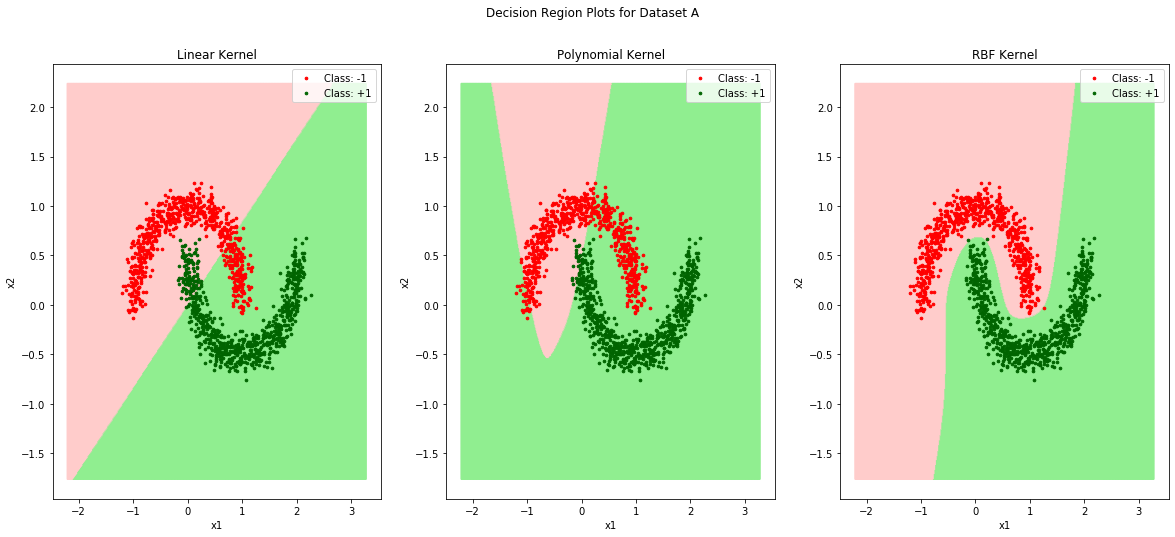

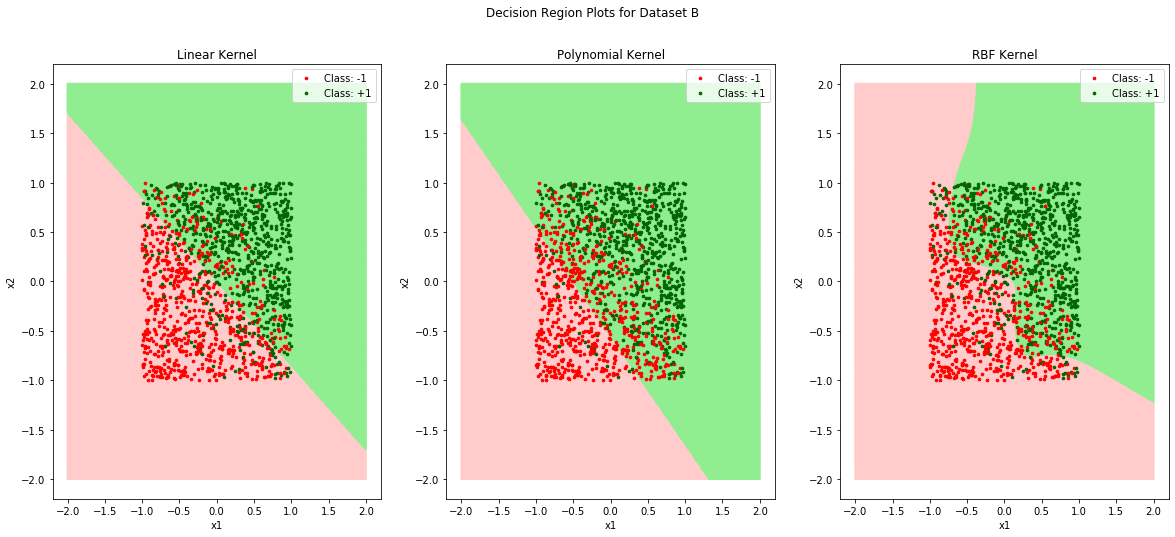

In [12]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

# Dataset A
dataset_A = np.load('dataset_A.npz')
X_train = dataset_A['arr_0']
Y_train = dataset_A['arr_1']
X_test = dataset_A['arr_2']
Y_test = dataset_A['arr_3']

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset A")

plt.subplot(1,3,1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'linear', reg_param = 1e-7, kernel_param = 1., num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'linear', kernel_param = 1.)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Linear Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,2)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'poly', reg_param = 1e-7, kernel_param = 4., num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'poly', kernel_param = 4.)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Polynomial Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'rbf', reg_param = 1e-7, kernel_param = 10., num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'rbf', kernel_param = 10.)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("RBF Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# Dataset B
dataset_B = np.load('dataset_B.npz')
X_train = dataset_B['arr_0']
Y_train = dataset_B['arr_1']
X_test = dataset_B['arr_2']
Y_test = dataset_B['arr_3']

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset B")

plt.subplot(1,3,1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'linear', reg_param = 1e-7, kernel_param = 1., num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'linear', kernel_param = 1.)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Linear Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,2)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'poly', reg_param = 1e-7, kernel_param = 1., num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'poly', kernel_param = 1.)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Polynomial Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'rbf', reg_param = 1e-7, kernel_param = 10, num_iter_gd=100)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred(alpha, X_train, Y_train, np.vstack((x[i], y[i])).T, kernel = 'rbf', kernel_param = 10)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("RBF Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [4]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

def train_pred_SVM(X, Y, kernel='linear', reg_param=1., kernel_param=1.):
    """
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    kernel = 'linear' or 'rbf' or 'poly' 
    reg_param = C
    kernel_param = degree for "poly" kernel and gamma for "rbf" kernel

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)
    
    """
    algorithm = svm.SVC(C = reg_param, kernel = kernel, degree = kernel_param, gamma = kernel_param)
    classifier = algorithm.fit(X, Y)
    return classifier

def test_pred_SVM(classifier, test_X):
    """
    Return the predictions on test_X using the learnt classifier
    """
    return classifier.predict(test_X)

In [22]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

# Dataset_A Validation
print("Dataset_A")
dataset_A = np.load('dataset_A.npz')
X_train = dataset_A['arr_0']
Y_train = dataset_A['arr_1']
X_test = dataset_A['arr_2']
Y_test = dataset_A['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for reg_param in reg_params:
    classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param = 1.)
    validation_pred = test_pred_SVM(classifier, X_train_validation)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
    
print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1e-1, 1, 1e1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param = 1.)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 5
reg_param = 10
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 10
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

# Dataset_B Validation
print("Dataset_B")
dataset_B = np.load('dataset_B.npz')
X_train = dataset_B['arr_0']
Y_train = dataset_B['arr_1']
X_test = dataset_B['arr_2']
Y_test = dataset_B['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for reg_param in reg_params:
    classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param = 1.)
    validation_pred = test_pred_SVM(classifier, X_train_validation)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
    
print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1e-1, 1, 1e1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param = 1.)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 1
reg_param = 1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 1
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)
        
# Dataset_C Validation
print("Dataset_C")
dataset_C = np.load('dataset_C.npz')
X_train = dataset_C['arr_0']
Y_train = dataset_C['arr_1']
X_test = dataset_C['arr_2']
Y_test = dataset_C['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:1000]
Y_train_split = Y_train[p][:1000]
X_train_validation = X_train[p][1000:]
Y_train_validation = Y_train[p][1000:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for reg_param in reg_params:
    classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param = 1.)
    validation_pred = test_pred_SVM(classifier, X_train_validation)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
    
print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-2, 1e-1, 1, 1e1, 1e2]
kernel_params = [1e-3, 1e-2, 1e-1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)

# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param = 1.)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 5
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)
  
kernel = "rbf"
kernel_param = 0.01
reg_param = 100
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

# Dataset_D Validation  
print("Dataset_D")
dataset_D = np.load('dataset_D.npz')
X_train = dataset_D['arr_0']
Y_train = dataset_D['arr_1']
X_test = dataset_D['arr_2']
Y_test = dataset_D['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 
p = np.random.permutation(len(X_train))
X_train_split = X_train[p][:300]
Y_train_split = Y_train[p][:300]
X_train_validation = X_train[p][300:]
Y_train_validation = Y_train[p][300:]

print("Linear Kernel")
kernel = "linear"
reg_params = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for reg_param in reg_params:
    classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param = 1.)
    validation_pred = test_pred_SVM(classifier, X_train_validation)
    accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
    print("Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
    
print("Polynomial Kernel")
kernel = "poly"
reg_params = [1e-7, 1e-5, 1e-3, 1e-1]
kernel_params = [1, 2, 3, 4, 5]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
print("Radial Basis Function Kernel")
kernel = "rbf"
reg_params = [1e-2, 1e-1, 1, 1e1, 1e2]
kernel_params = [1e-3, 1e-2, 1e-1]
for kernel_param in kernel_params:
    for reg_param in reg_params:
        classifier = train_pred_SVM(X_train_split, Y_train_split, kernel, reg_param, kernel_param)
        validation_pred = test_pred_SVM(classifier, X_train_validation)
        accuracy = np.count_nonzero(validation_pred == Y_train_validation)/len(Y_train_validation)
        print("Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Validation Accuracy:", accuracy)
        
# Normalized Zero-One Loss with best hyperparameters
kernel = "linear"
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param = 1.)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

kernel = "poly"
kernel_param = 1
reg_param = 0.1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)  

kernel = "rbf"
kernel_param = 0.01
reg_param = 1
classifier = train_pred_SVM(X_train, Y_train, kernel, reg_param, kernel_param)
train_prediction = test_pred_SVM(classifier, X_train)
test_prediction = test_pred_SVM(classifier, X_test)
train_loss = 1 - np.count_nonzero(train_prediction == Y_train)/len(Y_train)
test_loss = 1 - np.count_nonzero(test_prediction == Y_test)/len(Y_test)
print("Kernel", kernel,  "Kernel Parameter:", kernel_param, "Regularization Parameter:", reg_param, "Train Loss:", train_loss, "Test Loss:", test_loss)

Dataset_A
Linear Kernel
Regularization Parameter: 1e-07 Validation Accuracy: 0.504
Regularization Parameter: 1e-06 Validation Accuracy: 0.504
Regularization Parameter: 1e-05 Validation Accuracy: 0.504
Regularization Parameter: 0.0001 Validation Accuracy: 0.504
Regularization Parameter: 0.001 Validation Accuracy: 0.878
Regularization Parameter: 0.01 Validation Accuracy: 0.88
Regularization Parameter: 0.1 Validation Accuracy: 0.89
Regularization Parameter: 1 Validation Accuracy: 0.892
Regularization Parameter: 10.0 Validation Accuracy: 0.89
Polynomial Kernel
Kernel Parameter: 1 Regularization Parameter: 1e-07 Validation Accuracy: 0.504
Kernel Parameter: 1 Regularization Parameter: 1e-05 Validation Accuracy: 0.504
Kernel Parameter: 1 Regularization Parameter: 0.001 Validation Accuracy: 0.878
Kernel Parameter: 1 Regularization Parameter: 0.1 Validation Accuracy: 0.89
Kernel Parameter: 1 Regularization Parameter: 10.0 Validation Accuracy: 0.89
Kernel Parameter: 2 Regularization Parameter: 1

Kernel Parameter: 2 Regularization Parameter: 1e-07 Validation Accuracy: 0.484
Kernel Parameter: 2 Regularization Parameter: 1e-05 Validation Accuracy: 0.954
Kernel Parameter: 2 Regularization Parameter: 0.001 Validation Accuracy: 0.976
Kernel Parameter: 2 Regularization Parameter: 0.1 Validation Accuracy: 0.976
Kernel Parameter: 3 Regularization Parameter: 1e-07 Validation Accuracy: 0.974
Kernel Parameter: 3 Regularization Parameter: 1e-05 Validation Accuracy: 0.984
Kernel Parameter: 3 Regularization Parameter: 0.001 Validation Accuracy: 0.984
Kernel Parameter: 3 Regularization Parameter: 0.1 Validation Accuracy: 0.984
Kernel Parameter: 4 Regularization Parameter: 1e-07 Validation Accuracy: 0.988
Kernel Parameter: 4 Regularization Parameter: 1e-05 Validation Accuracy: 0.988
Kernel Parameter: 4 Regularization Parameter: 0.001 Validation Accuracy: 0.988
Kernel Parameter: 4 Regularization Parameter: 0.1 Validation Accuracy: 0.988
Kernel Parameter: 5 Regularization Parameter: 1e-07 Valida

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

<b>Note</b>: Best hyperparameters might change slightly with different runs as the validation set split is a random process. The values given below are taken from one run of the above cell and might not match exactly with the current run/output of the above cell.

## <center>Best Hyperparameters</center> 
<table>
    <tr><th> <center> Kernel Parameters </center> </th><th> <center> Regularization Parameters </center> </th></tr>
<tr><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| - | 5   | 10 |
| <b>Dataset B </b>| - | 1  | 1 |
| <b>Dataset C </b>| - | 5  | 0.01 |
| <b>Dataset D </b>| - | 1  | 0.01 |

</td><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 0.1 | 10   | 0.1 |
| <b>Dataset B </b>| 1 | 1  | 0.1 |
| <b>Dataset C </b>| 0.1 | 0.1  | 100 |
| <b>Dataset D </b>| 0.1 | 0.1  | 1 |

</td></tr> </table>

## <center>Normalized zero-one loss in percentage using best hyperparameters</center> 
<table>
    <tr><th> <center> Training Loss </center> </th><th> <center> Test Loss </center> </th></tr>
<tr><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 12.86% | 7.13% | 0.06% |
| <b>Dataset B </b>| 17.66% | 17.66%  | 17.46% |
| <b>Dataset C </b>| 6.53% | 0%  | 0% |
| <b>Dataset D </b>| 1.5% | 1.5%  | 2% |

</td><td>

|&darr;Data / Kernel&rarr;| Linear | Polynomial | RBF |  
|--------------------|---------|---------|---------|
| <b>Dataset A </b>| 13.4% | 8.59% | 0.4% |
| <b>Dataset B </b>| 20.79% | 20.79% | 20.59% |
| <b>Dataset C </b>| 11.11% | 3.36%  | 2.02% |
| <b>Dataset D </b>| 2.36% | 2.36%  | 1.18% |

</td></tr> </table>

## <center>Observations</center> 
Observations from the first question holds true and not repeated again for ease of reading. Comparing SVMs to Logistic Regression, SVMs are clearly faster and more accurate than Logistic Regression. Otherwise, the trends are pretty similar to each other. RBF kernel once again gives the best accuracy for Dataset A for the same reasons though the decision boundaries can be seen slightly variant away from the high density data region as seen in the plot below. Dataset B once again gives similar accuracies for all three kernels. Dataset C gives zero train accuracies for both the Polynomial Kernel as well as the RBF kernel though the RBF kernel outperforms in test accuracy, once again proving our statement about the highly non-linear nature of our data. Dataset D once again gives very high accuracies for all three kernels indicative of it's highly linearly separable nature. 

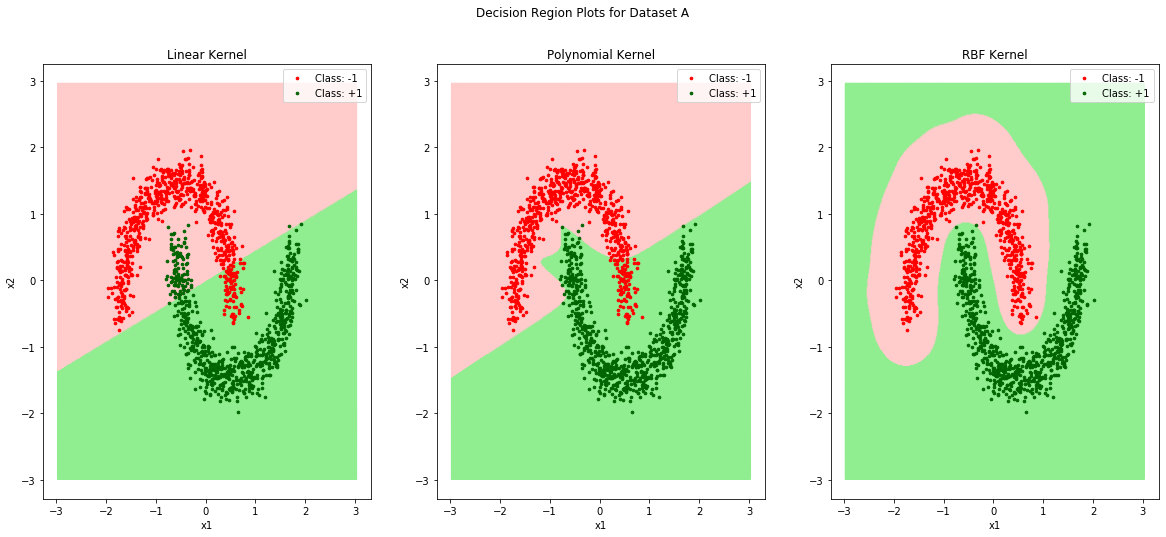

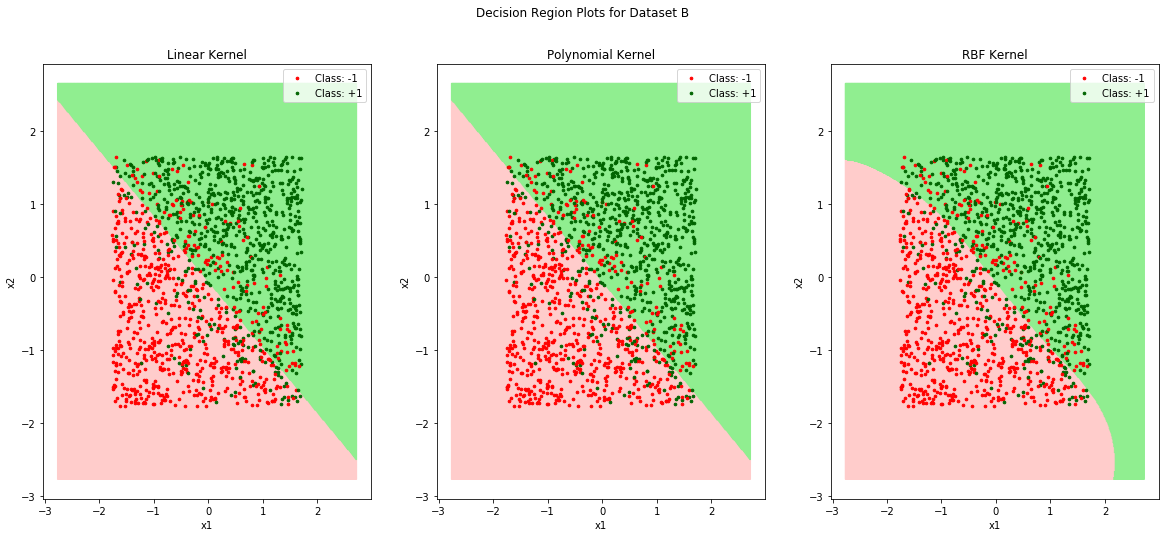

In [24]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

# Dataset A
dataset_A = np.load('dataset_A.npz')
X_train = dataset_A['arr_0']
Y_train = dataset_A['arr_1']
X_test = dataset_A['arr_2']
Y_test = dataset_A['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset A")

plt.subplot(1,3,1)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'linear', reg_param = 0.1, kernel_param = 1.)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Linear Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')

# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,2)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'poly', reg_param = 10, kernel_param = 5)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Polynomial Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')

# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,3)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'rbf', reg_param = 0.1, kernel_param = 10.)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("RBF Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# Dataset B
dataset_B = np.load('dataset_B.npz')
X_train = dataset_B['arr_0']
Y_train = dataset_B['arr_1']
X_test = dataset_B['arr_2']
Y_test = dataset_B['arr_3']
for i in range(X_train.shape[1]):
    X_test[:,i] = (X_test[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5)
    X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / (np.std(X_train[:,i]) + 1e-5) 

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset B")

plt.subplot(1,3,1)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'linear', reg_param = 1., kernel_param = 1.)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Linear Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')

# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,2)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'poly', reg_param = 1., kernel_param = 1.)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Polynomial Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')

# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

plt.subplot(1,3,3)
classifier = train_pred_SVM(X_train, Y_train, kernel = 'rbf', reg_param = 0.1, kernel_param = 1.)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = test_pred_SVM(classifier, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("RBF Kernel")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
# for i in range(len(Y_test)):
#     if(Y_test[i] == -1):
#         c0 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#FF0000')
#     elif(Y_test[i] == 1):
#         c1 = plt.scatter(X_test[i,0], X_test[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [14]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
def accent(X, Y, axis, split, criteria='accuracy'):
    splitdatar = []
    splitdatal = []
    for i in range(len(X)):
        if(X[i,axis] >= split):
            splitdatar.append(Y[i])
        else:
            splitdatal.append(Y[i])
    if(len(splitdatar) == 0 or len(splitdatal) == 0):
        if(criteria == "accuracy"):
            return -1
        elif(criteria == 'entropy'):
            return 1e5
    else:
        if(criteria == "accuracy"):
            accuracy = (splitdatar.count(1) + splitdatal.count(-1))/len(Y)
            if(1-accuracy > accuracy):
                accuracy = 1-accuracy
            return accuracy
        elif(criteria == 'entropy'):
            pl = len(splitdatal)/len(Y)
            pr = len(splitdatar)/len(Y)
            ql = splitdatal.count(1)/len(splitdatal)
            qr = splitdatar.count(1)/len(splitdatar)
            if(ql == 0 or ql == 1):
                hl = 0 
            else:
                hl = ql*np.log2(1/ql) + (1-ql)*np.log2(1/(1-ql))
            if(qr == 0 or qr == 1):
                hr = 0
            else:
                hr = qr*np.log2(1/qr) + (1-qr)*np.log2(1/(1-qr))
            entropy = pl * hl + pr * hr
            return entropy
    
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
# """ Returns a decision tree trained on X and Y. 
# Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
# Split criterion can be either 'accuracy' or 'entropy'.
# Returns a tree (In whatever format that you find appropriate)
# """

    tree=[]; incompletenodes=[]; totalnodes=0; xdivision=np.zeros((X.shape[1],10))
       
    for i in range(X.shape[1]):
        xdivision[i] = np.linspace(np.amin(X[:,i]),np.amax(X[:,i]), 12)[1:11] 
        
    if(criterion == "accuracy"):
        maxacc = 0; splitpt = 0; axis = 0; leaf = "None";
        for i in range(X.shape[1]):
            for j in range(10):
                ma = accent(X, Y, i, xdivision[i][j], "accuracy")
                if(ma > maxacc):
                    maxacc = ma
                    splitpt = xdivision[i][j]
                    axis = i
                        
    elif(criterion == "entropy"):
        minent = 1e5; splitpt = 0; axis = 0; leaf = "None";
        for i in range(X.shape[1]):
            for j in range(10):
                en = accent(X, Y, i, xdivision[i][j], "entropy")
                if(en < minent):
                    minent = en
                    splitpt = xdivision[i][j]
                    axis = i
                        
    node = [0, "None", "None", splitpt, axis, leaf]
    tree.append(node)
    totalnodes += 1
    Xl = X[X[:,axis] < splitpt]
    Yl = Y[X[:,axis] < splitpt]
    Xr = X[X[:,axis] >= splitpt]
    Yr = Y[X[:,axis] >= splitpt]
    inc = [node.copy(), Xl, Yl, Xr, Yr]
    incompletenodes.append(inc)
    
    while(len(incompletenodes)!=0):
        tempinc=[]
        for inc in incompletenodes:
            left=0; right=0
            #first left side (if num nodes condn is satisfied)
            if(len(inc[1]) <= num_nodes_stop):
                if(np.count_nonzero(inc[2] == -1) > np.count_nonzero(inc[2] == 1)):
                    leaf = -1
                else:
                    leaf = 1
                node = [totalnodes, inc[0][0], "left", "None", "None", leaf]
                tree.append(node)
                totalnodes += 1
                left = 1
            #check if all are the same
            elif(len(np.unique(inc[2])) == 1):
                node = [totalnodes,inc[0][0],"left","None","None",inc[2][0]]
                tree.append(node)
                totalnodes += 1
                left = 1
            #right side
            if(len(inc[3]) <= num_nodes_stop):
                if(np.count_nonzero(inc[4] == -1) > np.count_nonzero(inc[4] == 1)):
                    leaf = -1
                else:
                    leaf = 1
                node = [totalnodes,inc[0][0],"right","None","None",leaf]
                tree.append(node)
                totalnodes += 1
                right = 1
            #check if all are the same
            elif(len(np.unique(inc[4])) == 1):
                node = [totalnodes, inc[0][0], "right", "None", "None", inc[4][0]]
                tree.append(node)
                totalnodes += 1
                right = 1
                
            if(left == 0):
                xdivision = np.zeros((inc[1].shape[1],10))
                for i in range(inc[1].shape[1]):
                    xdivision[i] = np.linspace(np.amin(inc[1][:,i]),np.amax(inc[1][:,i]),12)[1:11] 
                
                if(criterion == "accuracy"):
                    maxacc = 0; rs = 0; splitpt = 0; axis = 0; leaf = "None";
                    for i in range(inc[1].shape[1]):
                        for j in range(10):
                            ma = accent(inc[1],inc[2],i,xdivision[i][j])
                            if(ma > maxacc):
                                maxacc = ma
                                splitpt = xdivision[i][j]
                                axis = i
                elif(criterion == "entropy"):
                    minent = 1e5; splitpt = 0; axis = 0; leaf = "None";
                    for i in range(inc[1].shape[1]):
                        for j in range(10):
                                en = accent(inc[1], inc[2], i, xdivision[i][j], "entropy")
                                if(en < minent):
                                    minent = en
                                    splitpt = xdivision[i][j]
                                    axis = i   
                                    
                node = [totalnodes, inc[0][0], "left", splitpt, axis, "None"]
                tree.append(node)
                totalnodes += 1
                Xl = inc[1][inc[1][:,axis] < splitpt]
                Yl = inc[2][inc[1][:,axis] < splitpt]
                Xr = inc[1][inc[1][:,axis] >= splitpt]
                Yr = inc[2][inc[1][:,axis] >= splitpt]
                inco = [node.copy(), Xl, Yl, Xr, Yr]
                tempinc.append(inco)
                
            if(right == 0):
                xdivision = np.zeros((inc[3].shape[1],10))
                for i in range(inc[3].shape[1]):
                    xdivision[i] = np.linspace(np.amin(inc[3][:,i]),np.amax(inc[3][:,i]),12)[1:11] 

                if(criterion == "accuracy"):
                    maxacc = 0; rs = 0; splitpt = 0; axis = 0; leaf = "None";
                    for i in range(inc[3].shape[1]):
                        for j in range(10):
                            ma = accent(inc[3],inc[4],i,xdivision[i][j])
                            if(ma > maxacc):
                                maxacc = ma
                                splitpt = xdivision[i][j]
                                axis = i
                elif(criterion == "entropy"):
                    minent = 1e5; splitpt = 0; axis = 0; leaf = "None";
                    for i in range(inc[3].shape[1]):
                        for j in range(10):
                                en = accent(inc[3],inc[4],i,xdivision[i][j],"entropy")
                                if(en < minent):
                                    minent = en
                                    splitpt = xdivision[i][j]
                                    axis = i 
                                    
                node = [totalnodes, inc[0][0], "right", splitpt, axis, "None"]
                tree.append(node)
                totalnodes += 1
                Xl = inc[3][inc[3][:,axis] < splitpt]
                Yl = inc[4][inc[3][:,axis] < splitpt]
                Xr = inc[3][inc[3][:,axis] >= splitpt]
                Yr = inc[4][inc[3][:,axis] >= splitpt]
                inco = [node.copy(), Xl, Yl, Xr, Yr]
                tempinc.append(inco)
        incompletenodes = tempinc.copy()
    return(tree)

def eval_decision_tree(tree, test_X):
# """ Takes in a tree, and a bunch of instances X and 
# returns the tree predicted values at those instances."""
    predictions = np.zeros((len(test_X)))
    for i in range(len(test_X)):
        pred = "None"
        node = "None"
        direction = "None"
        while(pred == "None"):
            for j in tree:
                if(j[1] == node and j[2] == direction):
                    node = j[0]
                    if(j[3] != "None"):
                        if(test_X[i,j[4]] >= j[3]):
                            direction = "right"
                        else:
                            direction = "left"
                    else:
                        pred = j[5]
                    break
        predictions[i] = pred
    return predictions    

In [15]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

Datasets = ['A','B','C','D']
num_nodes = [1,10,20,30,40,50,60,70,80,90,100]
for data in Datasets:
    print("Validation for Dataset_"+data+" using Accuracy")
    dataset = np.load("dataset_"+data+".npz")
    X = dataset['arr_0']
    Y = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for i in range(X.shape[1]):
        X_test[:,i] = (X_test[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
    p = np.random.permutation(len(X))
    X_train = X[p][:int(0.6*len(X))]
    Y_train = Y[p][:int(0.6*len(X))]
    X_train_validation = X[p][int(0.6*len(X)):]
    Y_train_validation = Y[p][int(0.6*len(X)):]

    bestacc = 0; bestnode = 0
    for num in num_nodes:
        tre = train_decision_tree(X_train, Y_train, num_nodes_stop = num,criterion = 'accuracy')
        Y_pred = eval_decision_tree(tre, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("Num_stop_nodes=",num," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            bestnode=num
    print("Best num_stop_nodes=",bestnode," and the corresponding validation accuracy is=",bestacc)
    tre=train_decision_tree(X, Y, num_nodes_stop=bestnode,criterion='accuracy')
    Ytrainpred=eval_decision_tree(tre, X)
    Y_pred=eval_decision_tree(tre, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train Accuracy is=",trainaccuracy," test accuracy is=",testaccuracy,"\n")
    
    print("Dataset_"+data+" using Entropy")
    bestacc=0; bestnode=0
    for num in num_nodes:
        tre=train_decision_tree(X_train, Y_train, num_nodes_stop=num,criterion='entropy')
        Y_pred=eval_decision_tree(tre, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("Num_stop_nodes=",num," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            bestnode=num
    print("Best num_stop_nodes=",bestnode," and the corresponding validation accuracy is=",bestacc)
    tre=train_decision_tree(X, Y, num_nodes_stop=bestnode,criterion='entropy')
    Ytrainpred=eval_decision_tree(tre, X)
    Y_pred=eval_decision_tree(tre, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train Accuracy is=",trainaccuracy," test accuracy is=",testaccuracy,"\n")

Validation for Dataset_A using Accuracy
Num_stop_nodes= 1  Accuracy is= 97.0
Num_stop_nodes= 10  Accuracy is= 96.0
Num_stop_nodes= 20  Accuracy is= 93.5
Num_stop_nodes= 30  Accuracy is= 91.33333333333333
Num_stop_nodes= 40  Accuracy is= 91.33333333333333
Num_stop_nodes= 50  Accuracy is= 91.5
Num_stop_nodes= 60  Accuracy is= 91.5
Num_stop_nodes= 70  Accuracy is= 91.5
Num_stop_nodes= 80  Accuracy is= 91.5
Num_stop_nodes= 90  Accuracy is= 91.5
Num_stop_nodes= 100  Accuracy is= 91.5
Best num_stop_nodes= 1  and the corresponding validation accuracy is= 97.0
Train Accuracy is= 100.0  test accuracy is= 97.0 

Dataset_A using Entropy
Num_stop_nodes= 1  Accuracy is= 99.33333333333333
Num_stop_nodes= 10  Accuracy is= 99.66666666666667
Num_stop_nodes= 20  Accuracy is= 99.66666666666667
Num_stop_nodes= 30  Accuracy is= 99.66666666666667
Num_stop_nodes= 40  Accuracy is= 99.66666666666667
Num_stop_nodes= 50  Accuracy is= 99.66666666666667
Num_stop_nodes= 60  Accuracy is= 99.66666666666667
Num_stop_n

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

<b>Note</b>: Best hyperparameters might change slightly with different runs as the validation set split is a random process. The values given below are taken from one run of the above cell and might not match exactly with the current run/output of the above cell. 
## <center>Best Hyperparameters (Num_stop_nodes)</center> 
<table>
    <tr><th> <center> Accuracy as criteria </center> </th><th> <center> Entropy as criteria </center> 
</th></tr>
<tr><td>

|Data| Num_stop_nodes | Validation Accuracy | 
|--------------------|---------|---------|
| <b>Dataset A </b> | 1  | 94.83% |
| <b>Dataset B </b> | 30 | 80.66% |
| <b>Dataset C </b> | 10 | 90.17% |
| <b>Dataset D </b> | 90 | 90.625%|

</td><td>
    
|Data| Num_stop_nodes | Validation Accuracy | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 1  | 99.66% |
| <b>Dataset B </b>| 40 | 80.83% |
| <b>Dataset C </b>| 1  | 91.5%  |
| <b>Dataset D </b>| 30 | 90%    |
    
</td></tr>
    
</table>

## <center>Normalized zero-one loss in percentage using best hyperparameters</center> 
<table>
    <tr><th> <center> Accuracy as criteria </center> </th><th> <center> Entropy as criteria </center> </th></tr>
<tr><td>

|Data | Training Error | Test Error | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 0%     | 3%   | 
| <b>Dataset B </b>| 15.86% | 22.2%  | 
| <b>Dataset C </b>| 5% | 11.45%  | 
| <b>Dataset D </b>| 4.75% | 4.14% | 

</td><td>

|Data | Training Error | Test Error | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 0%     | 0.79%   | 
| <b>Dataset B </b>| 14.93% | 21.6%  | 
| <b>Dataset C </b>| 0% | 9.76%  | 
| <b>Dataset D </b>| 4% | 4.14% |

</td></tr> </table>

## <center>Observations</center> 
Observations from the first two questions about the datasets hold true and not repeated again for ease of reading. For less noisy separable datasets (like dataset A), using lower num_stop_nodes gives better results. This is because the data has very little noise and decent amount of overfitting won't affect the test results. However, for noisy overlapping datasets (like dataset B), stopping at a higher num_stop_nodes gives better results, therefore avoiding overfitting. However, very high num_nodes_stop would once again lead to poor performance due to underfitting, unless if the dataset is clearly separated without much noise/overlap, in which case num_stop_nodes doesn't matter much (Take a look at Dataset D. The accuracy is more or less same and has no/less correlation with num_stop_nodes). Also, using entropy as the criteria produces faster and better results.

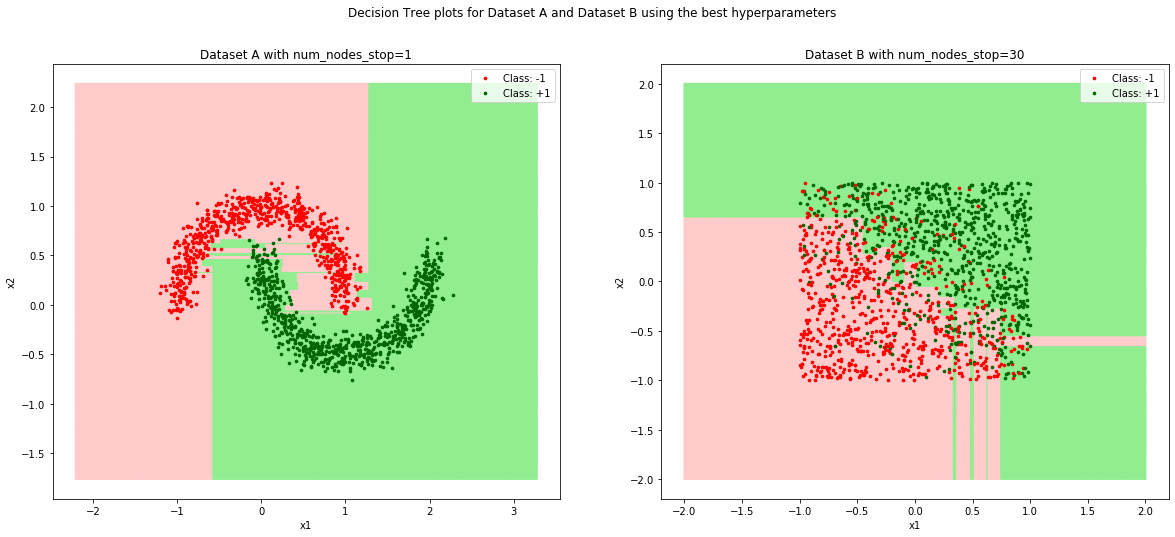

In [16]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

# Dataset A
dataset = np.load("dataset_A.npz")
X = dataset['arr_0']
Y = dataset['arr_1']
X_test = dataset['arr_2']
Y_test = dataset['arr_3']

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Tree plots for Dataset A and Dataset B using the best hyperparameters")

plt.subplot(1,2,1)
alpha = train_decision_tree(X, Y, num_nodes_stop=1,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_decision_tree(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset A with num_nodes_stop=1")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#FF0000')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

# Dataset B
dataset = np.load("dataset_B.npz")
X = dataset['arr_0']
Y = dataset['arr_1']
X_test = dataset['arr_2']
Y_test = dataset['arr_3']
plt.subplot(1,2,2)
alpha = train_decision_tree(X, Y, num_nodes_stop=30,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_decision_tree(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset B with num_nodes_stop=30")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#FF0000')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [18]:
# CodeWrite cell
# Write Random Forest classifier. 
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    forest=[]
    for i in range(num_trees):
        tree=[]; incompletenodes=[]; totalnodes=0; xdivision=np.zeros((X.shape[1],10))
        m=np.random.randint(0,len(X),int(a*len(X)))
        Xa=X[m]
        Ya=Y[m]
        for i in range(Xa.shape[1]):
            xdivision[i]=np.linspace(np.amin(Xa[:,i]),np.amax(Xa[:,i]),12)[1:11] 

        if(criterion=="accuracy"):
            maxacc=0; splitpt=0; axis=0; leaf="None";
            for i in range(Xa.shape[1]):
                for j in range(10):
                        ma=accent(Xa,Ya,i,xdivision[i][j])
                        if(ma>maxacc):
                            maxacc=ma
                            splitpt=xdivision[i][j]
                            axis=i
        elif(criterion=="entropy"):
            minent=1e5; splitpt=0; axis=0; leaf="None";
            for i in range(Xa.shape[1]):
                for j in range(10):
                        en=accent(Xa,Ya,i,xdivision[i][j],"entropy")
                        if(en<minent):
                            minent=en
                            splitpt=xdivision[i][j]
                            axis=i

        node=[0,"None","None",splitpt,axis,leaf]
        tree.append(node)
        totalnodes+=1
        Xl=Xa[Xa[:,axis]<splitpt]
        Yl=Ya[Xa[:,axis]<splitpt]
        Xr=Xa[Xa[:,axis]>=splitpt]
        Yr=Ya[Xa[:,axis]>=splitpt]      
        inc=[node.copy(),Xl,Yl,Xr,Yr]
        incompletenodes.append(inc)

        while(len(incompletenodes)!=0):
            tempinc=[]
            for inc in incompletenodes:
                left=0; right=0
                dl=np.random.randint(0,inc[1].shape[1],int(b*inc[1].shape[1]))
                Xl=inc[1][:,dl]
                Yl=inc[2]
                dr=np.random.randint(0,inc[3].shape[1],int(b*inc[3].shape[1]))
                Xr=inc[3][:,dr]
                Yr=inc[4]
                #first left side (if num nodes condn is satisfied)
                if(len(Xl)<=num_nodes_stop):
                    if(np.count_nonzero(Yl==-1)>np.count_nonzero(Yl==1)):
                        leaf=-1
                    else:
                        leaf=1
                    node=[totalnodes,inc[0][0],"left","None","None",leaf]
                    tree.append(node)
                    totalnodes+=1
                    left=1
                #check if all are the same
                elif(len(np.unique(Yl))==1):
                    node=[totalnodes,inc[0][0],"left","None","None",Yl[0]]
                    tree.append(node)
                    totalnodes+=1
                    left=1
                #right side
                if(len(Xr)<=num_nodes_stop):
                    if(np.count_nonzero(Yr==-1)>np.count_nonzero(Yr==1)):
                        leaf=-1
                    else:
                        leaf=1
                    node=[totalnodes,inc[0][0],"right","None","None",leaf]
                    tree.append(node)
                    totalnodes+=1
                    right=1
                #check if all are the same
                elif(len(np.unique(Yr))==1):
                    node=[totalnodes,inc[0][0],"right","None","None",Yr[0]]
                    tree.append(node)
                    totalnodes+=1
                    right=1
                if(left==0):
                    xdivision=np.zeros((Xl.shape[1],10))
                    for i in range(Xl.shape[1]):
                        xdivision[i]=np.linspace(np.amin(Xl[:,i]),np.amax(Xl[:,i]),12)[1:11] 

                    if(criterion=="accuracy"):
                        maxacc=0; splitpt=0; axis=0; leaf="None";
                        for i in range(Xl.shape[1]):
                            for j in range(10):
                                    ma=accent(Xl,Yl,i,xdivision[i][j])
                                    if(ma>maxacc):
                                        maxacc=ma
                                        splitpt=xdivision[i][j]
                                        axis=dl[i]
                    elif(criterion=="entropy"):
                        minent=1e5; splitpt=0; axis=0; leaf="None";
                        for i in range(Xl.shape[1]):
                            for j in range(10):
                                    en=accent(Xl,Yl,i,xdivision[i][j],"entropy")
                                    if(en<minent):
                                        minent=en
                                        splitpt=xdivision[i][j]
                                        axis=dl[i]
                                    
                    node=[totalnodes,inc[0][0],"left",splitpt,axis,"None"]
                    tree.append(node)
                    totalnodes+=1
                    Xll=inc[1][inc[1][:,axis]<splitpt]
                    Yll=inc[2][inc[1][:,axis]<splitpt]
                    Xlr=inc[1][inc[1][:,axis]>=splitpt]
                    Ylr=inc[2][inc[1][:,axis]>=splitpt]               
                    inco=[node.copy(),Xll,Yll,Xlr,Ylr]
                    tempinc.append(inco)

                if(right==0):
                    xdivision=np.zeros((Xr.shape[1],10))
                    for i in range(Xr.shape[1]):
                        xdivision[i]=np.linspace(np.amin(Xr[:,i]),np.amax(Xr[:,i]),12)[1:11] 

                    if(criterion=="accuracy"):
                        maxacc=0; splitpt=0; axis=0; leaf="None";
                        for i in range(Xr.shape[1]):
                            for j in range(10):
                                    ma=accent(Xr,Yr,i,xdivision[i][j])
                                    if(ma>maxacc):
                                        maxacc=ma
                                        splitpt=xdivision[i][j]
                                        axis=dr[i]
                    elif(criterion=="entropy"):
                        minent=1e5; splitpt=0; axis=0; leaf="None";
                        for i in range(Xr.shape[1]):
                            for j in range(10):
                                    en=accent(Xr,Yr,i,xdivision[i][j],"entropy")
                                    if(en<minent):
                                        minent=en
                                        splitpt=xdivision[i][j]
                                        axis=dr[i]

                    node=[totalnodes,inc[0][0],"right",splitpt,axis,"None"]
                    tree.append(node)
                    totalnodes+=1
                    Xrl=inc[3][inc[3][:,axis]<splitpt]
                    Yrl=inc[4][inc[3][:,axis]<splitpt]
                    Xrr=inc[3][inc[3][:,axis]>=splitpt]
                    Yrr=inc[4][inc[3][:,axis]>=splitpt]
                    inco=[node.copy(),Xrl,Yrl,Xrr,Yrr]
                    tempinc.append(inco)
            incompletenodes=tempinc.copy()
        forest.append(tree)
    return(forest)

def eval_random_forest(random_forest, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    predictions=np.zeros((len(test_X)))
    for i in range(len(test_X)):
        predat=np.zeros((len(random_forest)))
        for tree in range(len(random_forest)):
            pred="None"
            node="None"
            direction="None"
            while(pred=="None"):
                for j in random_forest[tree]:
                    if(j[1]==node and j[2]==direction):
                        node=j[0]
                        if(j[3]!="None"):
                            if(test_X[i,j[4]]>=j[3]):
                                direction="right"
                            else:
                                direction="left"
                        else:
                            pred=j[5]
                        break
            predat[tree]=pred
        if(np.count_nonzero(predat==-1)>np.count_nonzero(predat==1)):
            p=-1
        else:
            p=1
        predictions[i]=p
    return predictions

In [19]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
Datasets=['A','B','C','D']
num_trees=[1,10,20,30,40,50]
for data in Datasets:
    print("Dataset_"+data+" using Accuracy")
    dataset = np.load("dataset_"+data+".npz")
    X = dataset['arr_0']
    Y = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for i in range(X.shape[1]):
        X_test[:,i] = (X_test[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
    p = np.random.permutation(len(X))
    X_train = X[p][:int(0.6*len(X))]
    Y_train = Y[p][:int(0.6*len(X))]
    X_train_validation = X[p][int(0.6*len(X)):]
    Y_train_validation = Y[p][int(0.6*len(X)):]

    
    bestacc=0; besttree=0
    for treeno in num_trees:
        forest=train_random_forest(X_train, Y_train, num_trees=treeno, num_nodes_stop=1,criterion='accuracy')
        Y_pred=eval_random_forest(forest, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("No of trees=",treeno," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            besttree=treeno
    print("Best no of trees=",besttree," and the corresponding validation accuracy is=",bestacc)
    forest=train_random_forest(X, Y, num_trees=besttree, num_nodes_stop=1,criterion='accuracy')
    Ytrainpred=eval_random_forest(forest, X)
    Y_pred=eval_random_forest(forest, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train error is=",100-trainaccuracy," test error is=",100-testaccuracy,"\n")
    
    print("Dataset_"+data+" using Entropy")
    bestacc=0; bestnode=0
    for treeno in num_trees:
        forest=train_random_forest(X_train, Y_train, num_trees=treeno, num_nodes_stop=1,criterion='entropy')
        Y_pred=eval_random_forest(forest, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("No of trees=",treeno," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            besttree=treeno
    print("Best no of trees=",besttree," and the corresponding validation accuracy is=",bestacc)
    forest=train_random_forest(X, Y, num_trees=besttree, num_nodes_stop=1,criterion='entropy')
    Ytrainpred=eval_random_forest(forest, X)
    Y_pred=eval_random_forest(forest, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train Error is=",100-trainaccuracy," test error is=",100-testaccuracy,"\n")

Dataset_A using Accuracy
No of trees= 1  Accuracy is= 91.5
No of trees= 10  Accuracy is= 97.5
No of trees= 20  Accuracy is= 96.5
No of trees= 30  Accuracy is= 97.66666666666667
No of trees= 40  Accuracy is= 97.33333333333333
No of trees= 50  Accuracy is= 97.0
Best no of trees= 30  and the corresponding validation accuracy is= 97.66666666666667
Train error is= 0.20000000000000284  test error is= 1.0 

Dataset_A using Entropy
No of trees= 1  Accuracy is= 97.16666666666667
No of trees= 10  Accuracy is= 98.33333333333333
No of trees= 20  Accuracy is= 98.33333333333333
No of trees= 30  Accuracy is= 98.16666666666667
No of trees= 40  Accuracy is= 98.33333333333333
No of trees= 50  Accuracy is= 98.33333333333333
Best no of trees= 10  and the corresponding validation accuracy is= 98.33333333333333
Train Error is= 0.06666666666666288  test error is= 0.5999999999999943 

Dataset_B using Accuracy
No of trees= 1  Accuracy is= 76.0
No of trees= 10  Accuracy is= 81.0
No of trees= 20  Accuracy is= 81

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic). 

<b>Note</b>: Best hyperparameters might change slightly with different runs as the validation set split is a random process. The values given below are taken from one run of the above cell and might not match exactly with the current run/output of the above cell.

## <center>Best Hyperparameters (Number of trees)</center> 
<table>
    <tr><th> <center> Accuracy as criteria </center> </th><th> <center> Entropy as criteria </center> 
</th></tr>
<tr><td>

|Data| Number of trees | Validation Accuracy | 
|--------------------|---------|---------|
| <b>Dataset A </b> | 30  | 98.83% |
| <b>Dataset B </b> | 20 | 80.5% |
| <b>Dataset C </b> | 40 | 93.6% |
| <b>Dataset D </b> | 20 | 95.63%|

</td><td>
    
|Data| Number of trees | Validation Accuracy | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 30  | 99.66% |
| <b>Dataset B </b>| 50 | 79.3%   |
| <b>Dataset C </b>| 30  | 95.5%  |
| <b>Dataset D </b>| 20 | 94.375% |
    
</td></tr>
    
</table>

## <center>Normalized zero-one loss in percentage using best hyperparameters</center> 
<table>
    <tr><th> <center> Accuracy as criteria </center> </th><th> <center> Entropy as criteria </center> </th></tr>
<tr><td>

|Data | Training Error | Test Error | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 0.133%     | 0.8%   | 
| <b>Dataset B </b>| 5.26% | 22.2%  | 
| <b>Dataset C </b>| 1% | 6.73%  | 
| <b>Dataset D </b>| 1% | 2.36% | 

</td><td>

|Data | Training Error | Test Error | 
|--------------------|---------|---------|
| <b>Dataset A </b>| 0.066%     | 0.6%   | 
| <b>Dataset B </b>| 4.13% | 21.6%  | 
| <b>Dataset C </b>| 0.2% | 5.38%  | 
| <b>Dataset D </b>| 0.75% | 3.55% |

</td></tr> </table>

## <center>Observations</center>
Observations from the first three questions hold true and not repeated again for ease of reading. From the above shown values in tables, one can observe that test accuracy generally increases if we use more trees than one, indicative of the usefulness of ensemble methods for training. However, the accuracy more or less remains constant or decreases after a certain point. Using entropy as criteria lead to faster training and gave marginally better results. As evident, random forest produces better test accuracies compared to using just one decision tree (even after allowing a higher num_stop_node to prevent overfitting). However, training accuracies are better with a single decision tree as it overfits better on data.

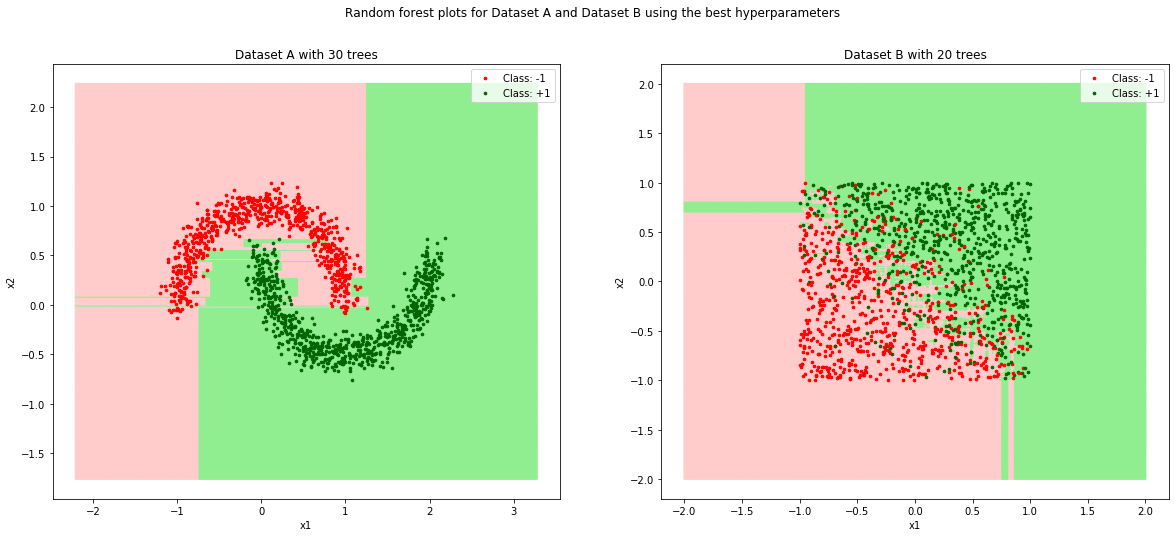

In [21]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and dataset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

# Dataset A
dataset = np.load("dataset_A.npz")
X = dataset['arr_0']
Y = dataset['arr_1']
X_test = dataset['arr_2']
Y_test = dataset['arr_3']

plt.figure(figsize=(20, 8))
plt.suptitle("Random forest plots for Dataset A and Dataset B using the best hyperparameters")

plt.subplot(1,2,1)
alpha = train_random_forest(X, Y, num_trees=1,num_nodes_stop=1,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_random_forest(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset A with 30 trees")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#FF0000')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

# Dataset B
dataset = np.load("dataset_B.npz")
X = dataset['arr_0']
Y = dataset['arr_1']
X_test = dataset['arr_2']
Y_test = dataset['arr_3']
plt.subplot(1,2,2)
alpha = train_random_forest(X, Y, num_trees=20, num_nodes_stop=1,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_random_forest(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset B with 20 trees")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#FF0000')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()